In [ ]:
# DNN to predict Cardiovascular disease
import csv
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as sk_model
import sklearn.preprocessing as sk_preprocessing
import sklearn.metrics as sk_metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)
# dataset input and output
url = "https://raw.githubusercontent.com/raihanbd2022gmailcom/cerebral-stroke-prediction/main/dataset.csv"
dataset = pd.read_csv(url, delimiter = ',')
dataset_len = dataset.shape[0]
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
del dataset["id"]
del dataset["work_type"]
del dataset["smoking_status"]

In [ ]:
dataset

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,Male,3.0,0,0,No,Rural,95.12,18.0,0
1,Male,58.0,1,0,Yes,Urban,87.96,39.2,0
2,Female,8.0,0,0,No,Urban,110.89,17.6,0
3,Female,70.0,0,0,Yes,Rural,69.04,35.9,0
4,Male,14.0,0,0,No,Rural,161.28,19.1,0
...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,Urban,58.64,20.4,0
43396,Female,56.0,0,0,Yes,Urban,213.61,55.4,0
43397,Female,82.0,1,0,Yes,Urban,91.94,28.9,0
43398,Male,40.0,0,0,Yes,Urban,99.16,33.2,0


In [13]:
# dataset manipulation
dataset["gender"] = dataset["gender"].replace({"Male":0,"Female":1})
dataset["ever_married"]  = dataset["ever_married"].replace({"No":0,"Yes":1})
dataset["Residence_type"] = dataset["Residence_type"].replace({"Rural":0,"Urban":1})

dataset

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0,3.0,0,0,0,0,95.12,18.0,0
1,0,58.0,1,0,1,1,87.96,39.2,0
2,1,8.0,0,0,0,1,110.89,17.6,0
3,1,70.0,0,0,1,0,69.04,35.9,0
4,0,14.0,0,0,0,0,161.28,19.1,0
...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,58.64,20.4,0
43396,1,56.0,0,0,1,1,213.61,55.4,0
43397,1,82.0,1,0,1,1,91.94,28.9,0
43398,0,40.0,0,0,1,1,99.16,33.2,0


In [15]:
# dataset summary
dataset.describe(include=[np.number])

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,0.643733,0.501290,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,0.478901,0.500004,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,1.000000,1.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,1.000000,1.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [16]:
# extraction of input and output from dataset for easy calculation
# "Outcome" = output column
# all other columns are input columns

dataset_columns = dataset.columns.values.tolist()
dataset_columns_number = len(dataset_columns)
input_columns  = dataset_columns[: dataset_columns_number - 1] 
output_columns = dataset_columns[  dataset_columns_number - 1 :]

input_columns, output_columns

(['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'Residence_type',
  'avg_glucose_level',
  'bmi'],
 ['stroke'])

In [17]:
# build input matrix
real_input  = dataset[input_columns].copy()
real_input

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0,3.0,0,0,0,0,95.12,18.0
1,0,58.0,1,0,1,1,87.96,39.2
2,1,8.0,0,0,0,1,110.89,17.6
3,1,70.0,0,0,1,0,69.04,35.9
4,0,14.0,0,0,0,0,161.28,19.1
...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,58.64,20.4
43396,1,56.0,0,0,1,1,213.61,55.4
43397,1,82.0,1,0,1,1,91.94,28.9
43398,0,40.0,0,0,1,1,99.16,33.2


In [18]:
# build output matrix
real_output = dataset[output_columns].copy() 
real_output

,stroke
0,0
1,0
2,0
3,0
4,0
...,...
43395,0
43396,0
43397,0
43398,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a70ea93d0>,
      dtype=object)

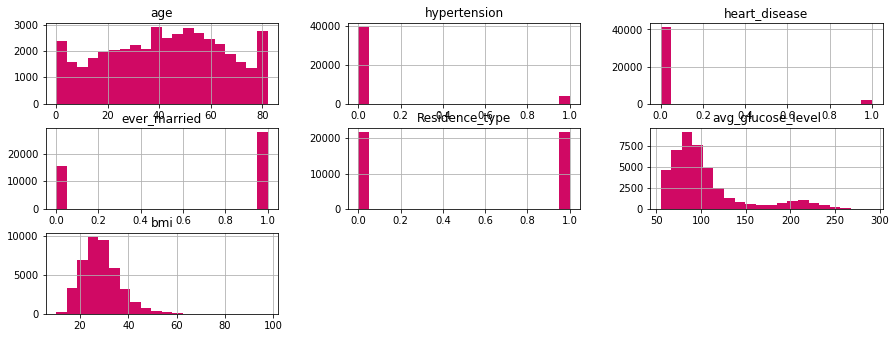

In [26]:
# histogram (data vs frequency)
real_input.hist(figsize  = (15, 15), layout = (8,3), color= '#D00964',bins = 20)